In [1]:
import pandas as pd
import jieba

In [2]:
text_ana=pd.read_excel('text_analysis_weibo_sample.xlsx')

In [3]:
def word_segment(x):
    words=jieba.lcut(x,cut_all=False)
    return ' '.join(words)
text_ana['标题/微博内容']=text_ana['标题/微博内容'].apply(word_segment)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/gt/hr3zd3gd7n9dmb8x_bjswg_00000gn/T/jieba.cache
Loading model cost 0.422 seconds.
Prefix dict has been built successfully.


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(text_ana['标题/微博内容'])
X.shape

(100, 5815)

In [5]:
#词频统计
feature_words=vectorizer.get_feature_names_out()
word_freq=dict(zip(feature_words,X.sum(axis=0).A1))
sorted(word_freq.items(),key=lambda x:x[1],reverse=True)

[('万吨', 170),
 ('市场', 168),
 ('库存', 103),
 ('中国', 93),
 ('预期', 92),
 ('需求', 88),
 ('下降', 82),
 ('电子', 82),
 ('加息', 75),
 ('同比', 75),
 ('上涨', 74),
 ('价格', 74),
 ('环比', 74),
 ('增长', 72),
 ('亿元', 71),
 ('经济', 70),
 ('反弹', 69),
 ('国内', 69),
 ('方面', 69),
 ('继续', 69),
 ('现货', 68),
 ('重要', 65),
 ('企业', 63),
 ('合约', 62),
 ('美联储', 62),
 ('行情', 62),
 ('政策', 60),
 ('10', 57),
 ('出口', 57),
 ('2022', 56),
 ('期货', 55),
 ('关注', 54),
 ('美元', 54),
 ('目前', 53),
 ('发展', 52),
 ('预计', 52),
 ('数据', 51),
 ('11', 49),
 ('公司', 49),
 ('交易', 48),
 ('报告', 48),
 ('影响', 47),
 ('2021', 46),
 ('增加', 46),
 ('持续', 46),
 ('策略', 45),
 ('郑州', 45),
 ('数字', 44),
 ('装置', 44),
 ('产量', 43),
 ('考生', 43),
 ('近期', 43),
 ('美国', 42),
 ('28', 41),
 ('减少', 41),
 ('可能', 41),
 ('显示', 41),
 ('原油', 40),
 ('城市', 40),
 ('建设', 39),
 ('来看', 38),
 ('重庆', 38),
 ('12', 37),
 ('主要', 37),
 ('截至', 37),
 ('计划', 37),
 ('资讯', 37),
 ('国家', 36),
 ('建议', 36),
 ('震荡', 36),
 ('复盘', 35),
 ('开工率', 35),
 ('短期', 35),
 ('下游', 34),
 ('风险', 34),
 ('主力', 33),
 ('

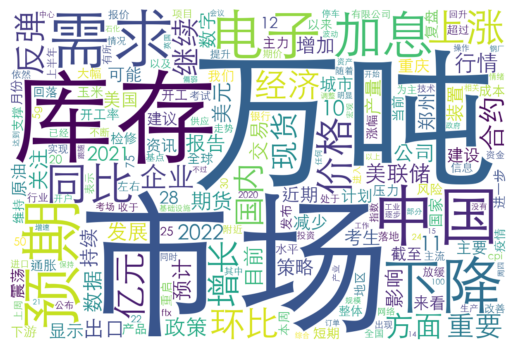

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
font_path = "/System/Library/Fonts/STHeiti Light.ttc"
wc = WordCloud(
    width=1200,
    height=800,
    max_words=200,
   # max_font_size=100,
    font_path=font_path,
    colormap="viridis",
    background_color='white'
)

wc.generate_from_frequencies(word_freq)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()